In [0]:
import mlflow

# Enable autologging
mlflow.pyspark.ml.autolog()

In [0]:
# Load the dataset into a Spark DataFrame:

steam_df = (
    spark.read.schema(
        "user_id Integer,name_of_game String,action String,nb_hours_played Integer"
    )
    .option("mode", "DROPMALFORMED")
    .csv(
        "/FileStore/tables/steam_200k-2.csv",
    )
)

In [0]:
steam_df.display()

user_id name_of_game action nb_hours_played 151603712 The Elder Scrolls V Skyrim purchase 1 151603712 The Elder Scrolls V Skyrim play 273 151603712 Fallout 4 purchase 1 151603712 Fallout 4 play 87 151603712 Spore purchase 1 151603712 Fallout New Vegas purchase 1 151603712 Left 4 Dead 2 purchase 1 151603712 HuniePop purchase 1 151603712 Path of Exile purchase 1 151603712 Poly Bridge purchase 1 151603712 Left 4 Dead purchase 1 151603712 Team Fortress 2 purchase 1 151603712 Tomb Raider purchase 1 151603712 The Banner Saga purchase 1 151603712 The Banner Saga play 2 151603712 Dead Island Epidemic purchase 1 151603712 BioShock Infinite purchase 1 151603712 Dragon Age Origins - Ultimate Edition purchase 1 151603712 Fallout 3 - Game of the Year Edition purchase 1 151603712 SEGA Genesis & Mega Drive Classics purchase 1 151603712 Grand Theft Auto IV purchase 1 151603712 Realm of the Mad God purchase 1 151603712 Marvel Heroes 2015 purchase 1 151603712 Eldevin purchase 1 151603712 Dota 2 purchase 1 151603712 BioShock purchase 1 151603712 Robocraft purchase 1 151603712 Garry's Mod purchase 1 151603712 Jazzpunk purchase 1 151603712 Alan Wake purchase 1 151603712 BioShock 2 purchase 1 151603712 Fallen Earth purchase 1 151603712 Fallout New Vegas Courier's Stash purchase 1 151603712 Fallout New Vegas Dead Money purchase 1 151603712 Fallout New Vegas Honest Hearts purchase 1 151603712 Grand Theft Auto Episodes from Liberty City purchase 1 151603712 Hitman Absolution purchase 1 151603712 HuniePop Official Digital Art Collection purchase 1 151603712 HuniePop Original Soundtrack purchase 1 151603712 The Banner Saga - Mod Content purchase 1 151603712 The Elder Scrolls V Skyrim - Dawnguard purchase 1 151603712 The Elder Scrolls V Skyrim - Dragonborn purchase 1 151603712 The Elder Scrolls V Skyrim - Hearthfire purchase 1 187131847 Dota 2 purchase 1 59945701 Ultra Street Fighter IV purchase 1 59945701 Ultra Street Fighter IV play 238 59945701 FINAL FANTASY XIII purchase 1 59945701 FINAL FANTASY XIII play 84 59945701 The Elder Scrolls V Skyrim purchase 1 59945701 The Elder Scrolls V Skyrim play 58 59945701 Sid Meier's Civilization V purchase 1 59945701 Sid Meier's Civilization V play 22 59945701 L.A. Noire purchase 1 59945701 Company of Heroes Tales of Valor purchase 1 59945701 7 Days to Die purchase 1 59945701 Divekick purchase 1 59945701 Divekick play 7 59945701 FINAL FANTASY VII purchase 1 59945701 Orcs Must Die! 2 purchase 1 59945701 Killing Floor purchase 1 59945701 Company of Heroes purchase 1 59945701 Bastion purchase 1 59945701 Undertale purchase 1 59945701 Counter-Strike Global Offensive purchase 1 59945701 Orcs Must Die! purchase 1 59945701 THE KING OF FIGHTERS XIII STEAM EDITION purchase 1 59945701 GUILTY GEAR XX ACCENT CORE PLUS R purchase 1 59945701 Skullgirls purchase 1 59945701 Assassin's Creed II purchase 1 59945701 Company of Heroes Opposing Fronts purchase 1 59945701 Team Fortress 2 purchase 1 59945701 Guilty Gear X2 #Reload purchase 1 59945701 Left 4 Dead 2 purchase 1 59945701 Psychonauts purchase 1 59945701 Cities in Motion 2 purchase 1 59945701 Company of Heroes (New Steam Version) purchase 1 59945701 Company of Heroes 2 purchase 1 59945701 Fallout New Vegas purchase 1 59945701 Fallout New Vegas Courier's Stash purchase 1 59945701 Fallout New Vegas Dead Money purchase 1 59945701 Fallout New Vegas Honest Hearts purchase 1 59945701 Garry's Mod purchase 1 59945701 Killing Floor Mod Defence Alliance 2 purchase 1 59945701 Magicka purchase 1 59945701 Magicka Vietnam purchase 1 59945701 Natural Selection 2 purchase 1 59945701 Psychonauts Demo purchase 1 59945701 Sanctum purchase 1 59945701 Sanctum 2 purchase 1 59945701 Serious Sam 3 BFE purchase 1 59945701 Skullgirls Endless Beta purchase 1 59945701 Skyrim High Resolution Texture Pack purchase 1 53875128 Grand Theft Auto V purchase 1 53875128 Grand Theft Auto V play 86 53875128 Insurgency purchase 1 53875128 Insurgency play 72 53875128 Left 4 Dead 2 purchase 1 53875128 Left 4 Dead 2 pla

In [0]:
# Generate unique integer IDs for each game:

from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

window = Window.orderBy("name_of_game").partitionBy()
steam_df = steam_df.withColumn("game_id", row_number().over(window).cast("integer"))


In [0]:
from pyspark.sql.functions import col, count, when

# Assuming your DataFrame is named "steam_df"
columns = steam_df.columns

null_counts = {}

for column in columns:
    null_count = steam_df.select(count(when(col(column).isNull(), column)).alias(f"{column}_nulls")).collect()[0][f"{column}_nulls"]
    null_counts[column] = null_count

print("Number of null values:")
for column, count in null_counts.items():
    print(f"{column}: {count}")

Number of null values:
user_id: 0
name_of_game: 0
action: 0
nb_hours_played: 0


In [0]:
from pyspark.sql.functions import count, col

# Count the number of unique members and games
num_members = steam_df.select("user_id").distinct().count()
num_games = steam_df.select("name_of_game").distinct().count()

print(f"Number of unique members: {num_members}")
print(f"Number of unique games: {num_games}")

# Count the number of purchases and plays
num_purchases = steam_df.filter(col("action") == "purchase").count()
num_plays = steam_df.filter(col("action") == "play").count()

print(f"Number of purchases: {num_purchases}")
print(f"Number of plays: {num_plays}")

Number of unique members: 12393
Number of unique games: 5155
Number of purchases: 129511
Number of plays: 70489


In [0]:
top_games = steam_df.filter(steam_df.action == "purchase") \
                    .groupBy("name_of_game") \
                    .count() \
                    .orderBy(col("count").desc())
top_games.show()

+--------------------+-----+
|        name_of_game|count|
+--------------------+-----+
|              Dota 2| 4841|
|     Team Fortress 2| 2323|
|            Unturned| 1563|
|Counter-Strike Gl...| 1412|
|Half-Life 2 Lost ...|  981|
|Counter-Strike So...|  978|
|       Left 4 Dead 2|  951|
|      Counter-Strike|  856|
|            Warframe|  847|
|Half-Life 2 Death...|  823|
|         Garry's Mod|  731|
|The Elder Scrolls...|  717|
|           Robocraft|  689|
|Counter-Strike Co...|  679|
|Counter-Strike Co...|  679|
|   Heroes & Generals|  658|
|         Half-Life 2|  639|
|Sid Meier's Civil...|  596|
|         War Thunder|  590|
|              Portal|  588|
+--------------------+-----+
only showing top 20 rows



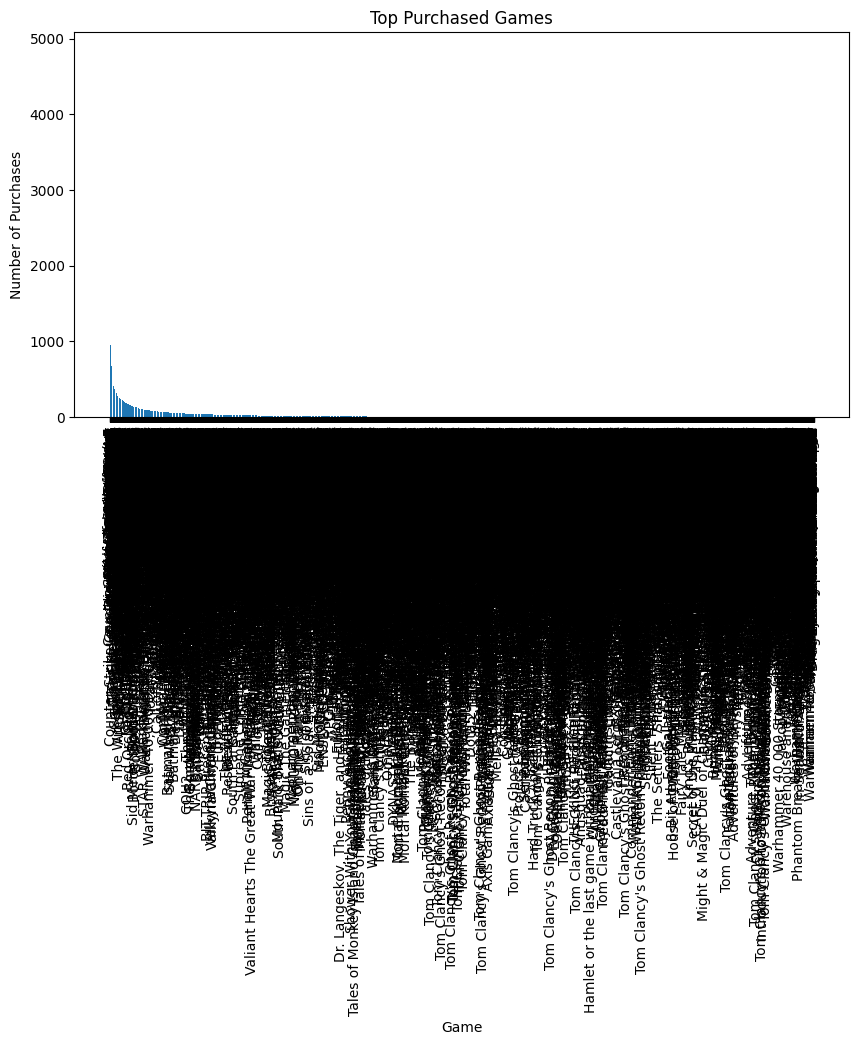

In [0]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the top_games DataFrame to a pandas DataFrame
top_games_df = top_games.toPandas()

# Plot a graph for the top purchased games
plt.figure(figsize=(10, 5))
plt.bar(top_games_df["name_of_game"], top_games_df["count"])
plt.xlabel("Game")
plt.ylabel("Number of Purchases")
plt.title("Top Purchased Games")
plt.xticks(rotation=90)
plt.show()

In [0]:
from pyspark.sql.functions import col, count, when

# Count the number of 'play' and 'purchase' behaviors for each game
result = steam_df.groupBy("name_of_game") \
           .agg(
               count(when(col("action") == "play", True)).alias("play_count"),
               count(when(col("action") == "purchase", True)).alias("purchase_count")
           )

# Show the result
result.show()

+--------------------+----------+--------------+
|        name_of_game|play_count|purchase_count|
+--------------------+----------+--------------+
|              Dota 2|      4841|          4841|
|METAL GEAR SOLID ...|        66|            68|
|LEGO Batman The V...|         6|            11|
|                RIFT|        75|           161|
|             Anodyne|         3|            11|
|  Legend of Grimrock|        35|            58|
|Divinity Original...|        67|            71|
|            Meltdown|         0|             4|
|SanctuaryRPG Blac...|         1|             5|
|       Snuggle Truck|         5|             9|
|        Lunar Flight|         6|            10|
|          Dungeons 2|         6|             6|
|      Zuma's Revenge|         3|             4|
|         HassleHeart|         0|             1|
|Ihf Handball Chal...|         0|             1|
|NEON STRUCT Sound...|         0|             2|
|Dust An Elysian Tail|        46|            76|
|Call of Duty Mode..

In [0]:
# Combine purchase and play behaviours into a single DataFrame:

from pyspark.sql.functions import when, col

combined_df = steam_df.withColumn("rating", when(col("action") == "purchase", 1).otherwise(col("nb_hours_played")))


In [0]:
combined_df.display()

user_id name_of_game action nb_hours_played rating 151603712 The Elder Scrolls V Skyrim purchase 1 1 151603712 The Elder Scrolls V Skyrim play 273 273 151603712 Fallout 4 purchase 1 1 151603712 Fallout 4 play 87 87 151603712 Spore purchase 1 1 151603712 Fallout New Vegas purchase 1 1 151603712 Left 4 Dead 2 purchase 1 1 151603712 HuniePop purchase 1 1 151603712 Path of Exile purchase 1 1 151603712 Poly Bridge purchase 1 1 151603712 Left 4 Dead purchase 1 1 151603712 Team Fortress 2 purchase 1 1 151603712 Tomb Raider purchase 1 1 151603712 The Banner Saga purchase 1 1 151603712 The Banner Saga play 2 2 151603712 Dead Island Epidemic purchase 1 1 151603712 BioShock Infinite purchase 1 1 151603712 Dragon Age Origins - Ultimate Edition purchase 1 1 151603712 Fallout 3 - Game of the Year Edition purchase 1 1 151603712 SEGA Genesis & Mega Drive Classics purchase 1 1 151603712 Grand Theft Auto IV purchase 1 1 151603712 Realm of the Mad God purchase 1 1 151603712 Marvel Heroes 2015 purchase 1 1 151603712 Eldevin purchase 1 1 151603712 Dota 2 purchase 1 1 151603712 BioShock purchase 1 1 151603712 Robocraft purchase 1 1 151603712 Garry's Mod purchase 1 1 151603712 Jazzpunk purchase 1 1 151603712 Alan Wake purchase 1 1 151603712 BioShock 2 purchase 1 1 151603712 Fallen Earth purchase 1 1 151603712 Fallout New Vegas Courier's Stash purchase 1 1 151603712 Fallout New Vegas Dead Money purchase 1 1 151603712 Fallout New Vegas Honest Hearts purchase 1 1 151603712 Grand Theft Auto Episodes from Liberty City purchase 1 1 151603712 Hitman Absolution purchase 1 1 151603712 HuniePop Official Digital Art Collection purchase 1 1 151603712 HuniePop Original Soundtrack purchase 1 1 151603712 The Banner Saga - Mod Content purchase 1 1 151603712 The Elder Scrolls V Skyrim - Dawnguard purchase 1 1 151603712 The Elder Scrolls V Skyrim - Dragonborn purchase 1 1 151603712 The Elder Scrolls V Skyrim - Hearthfire purchase 1 1 187131847 Dota 2 purchase 1 1 59945701 Ultra Street Fighter IV purchase 1 1 59945701 Ultra Street Fighter IV play 238 238 59945701 FINAL FANTASY XIII purchase 1 1 59945701 FINAL FANTASY XIII play 84 84 59945701 The Elder Scrolls V Skyrim purchase 1 1 59945701 The Elder Scrolls V Skyrim play 58 58 59945701 Sid Meier's Civilization V purchase 1 1 59945701 Sid Meier's Civilization V play 22 22 59945701 L.A. Noire purchase 1 1 59945701 Company of Heroes Tales of Valor purchase 1 1 59945701 7 Days to Die purchase 1 1 59945701 Divekick purchase 1 1 59945701 Divekick play 7 7 59945701 FINAL FANTASY VII purchase 1 1 59945701 Orcs Must Die! 2 purchase 1 1 59945701 Killing Floor purchase 1 1 59945701 Company of Heroes purchase 1 1 59945701 Bastion purchase 1 1 59945701 Undertale purchase 1 1 59945701 Counter-Strike Global Offensive purchase 1 1 59945701 Orcs Must Die! purchase 1 1 59945701 THE KING OF FIGHTERS XIII STEAM EDITION purchase 1 1 59945701 GUILTY GEAR XX ACCENT CORE PLUS R purchase 1 1 59945701 Skullgirls purchase 1 1 59945701 Assassin's Creed II purchase 1 1 59945701 Company of Heroes Opposing Fronts purchase 1 1 59945701 Team Fortress 2 purchase 1 1 59945701 Guilty Gear X2 #Reload purchase 1 1 59945701 Left 4 Dead 2 purchase 1 1 59945701 Psychonauts purchase 1 1 59945701 Cities in Motion 2 purchase 1 1 59945701 Company of Heroes (New Steam Version) purchase 1 1 59945701 Company of Heroes 2 purchase 1 1 59945701 Fallout New Vegas purchase 1 1 59945701 Fallout New Vegas Courier's Stash purchase 1 1 59945701 Fallout New Vegas Dead Money purchase 1 1 59945701 Fallout New Vegas Honest Hearts purchase 1 1 59945701 Garry's Mod purchase 1 1 59945701 Killing Floor Mod Defence Alliance 2 purchase 1 1 59945701 Magicka purchase 1 1 59945701 Magicka Vietnam purchase 1 1 59945701 Natural Selection 2 purchase 1 1 59945701 Psychonauts Demo purchase 1 1 59945701 Sanctum purchase 1 1 59945701 Sanctum 2 purchase 1 1 59945701 Serious Sam 3 BFE purchase 1 1 59945701 Skullgirls Endless Beta purchase 1 1 59945701 Skyrim High Resolution Texture Pack purchase

In [0]:
from pyspark.sql.functions import row_number
from pyspark.sql.window import Window

from pyspark.sql.functions import row_number, when, col
from pyspark.sql.window import Window

# Generate unique integer IDs for each game
window = Window.orderBy("name_of_game").partitionBy()
combined_df = combined_df.withColumn("game_id", when(col("name_of_game").isNotNull(), row_number().over(window)).otherwise(None).cast("integer"))

In [0]:
combined_df.show()

+---------+--------------------+--------+---------------+------+-------+
|  user_id|        name_of_game|  action|nb_hours_played|rating|game_id|
+---------+--------------------+--------+---------------+------+-------+
| 46055854|         007 Legends|purchase|              1|     1|      1|
| 86055705|           0RBITALIS|purchase|              1|     1|      2|
| 11940338|           0RBITALIS|purchase|              1|     1|      3|
| 93030550|           0RBITALIS|purchase|              1|     1|      4|
| 65117175|1... 2... 3... KI...|purchase|              1|     1|      5|
| 49893565|1... 2... 3... KI...|purchase|              1|     1|      6|
| 78560022|1... 2... 3... KI...|purchase|              1|     1|      7|
| 11794760|1... 2... 3... KI...|purchase|              1|     1|      8|
| 35701646|1... 2... 3... KI...|purchase|              1|     1|      9|
| 50818751|1... 2... 3... KI...|purchase|              1|     1|     10|
| 50818751|1... 2... 3... KI...|    play|          

In [0]:
# Use RFormula to convert the data into the required format:

from pyspark.ml.feature import RFormula

formula = RFormula(
    formula="rating ~ user_id + game_id",
    featuresCol="features",
    labelCol="label"
)

model = formula.fit(combined_df)
transformed_data = model.transform(combined_df)


2024/04/30 08:17:25 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '8cb904b564fc4151a98af60c30dc68fb', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow


In [0]:
transformed_data.display()

user_id name_of_game action nb_hours_played rating game_id features label 46055854 007 Legends purchase 1 1 1 Map(vectorType -> dense, length -> 2, values -> List(4.6055854E7, 1.0)) 1.0 86055705 0RBITALIS purchase 1 1 2 Map(vectorType -> dense, length -> 2, values -> List(8.6055705E7, 2.0)) 1.0 11940338 0RBITALIS purchase 1 1 3 Map(vectorType -> dense, length -> 2, values -> List(1.1940338E7, 3.0)) 1.0 93030550 0RBITALIS purchase 1 1 4 Map(vectorType -> dense, length -> 2, values -> List(9.303055E7, 4.0)) 1.0 65117175 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 5 Map(vectorType -> dense, length -> 2, values -> List(6.5117175E7, 5.0)) 1.0 49893565 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 6 Map(vectorType -> dense, length -> 2, values -> List(4.9893565E7, 6.0)) 1.0 78560022 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 7 Map(vectorType -> dense, length -> 2, values -> List(7.8560022E7, 7.0)) 1.0 11794760 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 8 Map(vectorType -> dense, length -> 2, values -> List(1.179476E7, 8.0)) 1.0 35701646 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 9 Map(vectorType -> dense, length -> 2, values -> List(3.5701646E7, 9.0)) 1.0 50818751 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 10 Map(vectorType -> dense, length -> 2, values -> List(5.0818751E7, 10.0)) 1.0 50818751 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) play 5 5 11 Map(vectorType -> dense, length -> 2, values -> List(5.0818751E7, 11.0)) 5.0 58345543 1... 2... 3... KICK IT! (Drop That Beat Like an Ugly Baby) purchase 1 1 12 Map(vectorType -> dense, length -> 2, values -> List(5.8345543E7, 12.0)) 1.0 33013552 10 Second Ninja purchase 1 1 13 Map(vectorType -> dense, length -> 2, values -> List(3.3013552E7, 13.0)) 1.0 86055705 10 Second Ninja purchase 1 1 14 Map(vectorType -> dense, length -> 2, values -> List(8.6055705E7, 14.0)) 1.0 11940338 10 Second Ninja purchase 1 1 15 Map(vectorType -> dense, length -> 2, values -> List(1.1940338E7, 15.0)) 1.0 124725852 10 Second Ninja purchase 1 1 16 Map(vectorType -> dense, length -> 2, values -> List(1.24725852E8, 16.0)) 1.0 13190476 10 Second Ninja purchase 1 1 17 Map(vectorType -> dense, length -> 2, values -> List(1.3190476E7, 17.0)) 1.0 16645459 10 Second Ninja purchase 1 1 18 Map(vectorType -> dense, length -> 2, values -> List(1.6645459E7, 18.0)) 1.0 33865373 10,000,000 purchase 1 1 19 Map(vectorType -> dense, length -> 2, values -> List(3.3865373E7, 19.0)) 1.0 48028873 100% Orange Juice purchase 1 1 20 Map(vectorType -> dense, length -> 2, values -> List(4.8028873E7, 20.0)) 1.0 93644606 100% Orange Juice purchase 1 1 21 Map(vectorType -> dense, length -> 2, values -> List(9.3644606E7, 21.0)) 1.0 197328486 100% Orange Juice purchase 1 1 22 Map(vectorType -> dense, length -> 2, values -> List(1.97328486E8, 22.0)) 1.0 197328486 100% Orange Juice play 35 35 23 Map(vectorType -> dense, length -> 2, values -> List(1.97328486E8, 23.0)) 35.0 125017535 100% Orange Juice purchase 1 1 24 Map(vectorType -> dense, length -> 2, values -> List(1.25017535E8, 24.0)) 1.0 88525821 100% Orange Juice purchase 1 1 25 Map(vectorType -> dense, length -> 2, values -> List(8.8525821E7, 25.0)) 1.0 152078939 100% Orange Juice purchase 1 1 26 Map(vectorType -> dense, length -> 2, values -> List(1.52078939E8, 26.0)) 1.0 152078939 100% Orange Juice play 31 31 27 Map(vectorType -> dense, length -> 2, values -> List(1.52078939E8, 27.0)) 31.0 115996656 100% Orange Juice purchase 1 1 28 Map(vectorType -> dense, length -> 2, values -> List(1.15996656E8, 28.0)) 1.0 167815968 100% Orange Juice purchase 1 1 29 Map(vectorType -> dense, length -> 2, values -> List(1.67815968E8, 29.0)) 1.0 134322141 100% Orange Juice purchase 1 1 30 Map(vectorType -> dense, length -> 2, values -> List(1.34322141E8, 30.0)) 1.0 172518437 100% Orange Juice purchase 1 1 31 Map(vectorT

In [0]:
# Split the transformed data into training and test sets:

(train_data, test_data) = transformed_data.randomSplit([0.8, 0.2])


In [0]:
# Check the unique values in the label column:

print(train_data.select("label").distinct().collect())


[Row(label=1.0), Row(label=62.0), Row(label=24.0), Row(label=22.0), Row(label=65.0), Row(label=165.0), Row(label=271.0), Row(label=25.0), Row(label=15.0), Row(label=207.0), Row(label=57.0), Row(label=113.0), Row(label=37.0), Row(label=44.0), Row(label=109.0), Row(label=45.0), Row(label=7.0), Row(label=21.0), Row(label=78.0), Row(label=544.0), Row(label=74.0), Row(label=49.0), Row(label=28.0), Row(label=9.0), Row(label=82.0), Row(label=92.0), Row(label=2.0), Row(label=52.0), Row(label=39.0), Row(label=33.0), Row(label=135.0), Row(label=1019.0), Row(label=40.0), Row(label=89.0), Row(label=29.0), Row(label=3.0), Row(label=489.0), Row(label=38.0), Row(label=216.0), Row(label=20.0), Row(label=59.0), Row(label=76.0), Row(label=75.0), Row(label=32.0), Row(label=51.0), Row(label=147.0), Row(label=26.0), Row(label=46.0), Row(label=35.0), Row(label=1329.0), Row(label=67.0), Row(label=83.0), Row(label=48.0), Row(label=54.0), Row(label=58.0), Row(label=36.0), Row(label=4.0), Row(label=30.0), Row(l

In [0]:
# If the label values are not in the expected range, you can remap them:

from pyspark.sql.functions import when, col

train_data = train_data.withColumn("label", when(col("label") >= 100, 99).otherwise(col("label")))
test_data = test_data.withColumn("label", when(col("label") >= 100, 99).otherwise(col("label")))


In [0]:
train_data.printSchema()

root
 |-- user_id: integer (nullable = true)
 |-- name_of_game: string (nullable = true)
 |-- action: string (nullable = true)
 |-- nb_hours_played: integer (nullable = true)
 |-- rating: integer (nullable = true)
 |-- game_id: integer (nullable = true)
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)



In [0]:
# fit the DecisionTreeClassifier model:

from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features")


In [0]:
# Refit the DecisionTreeClassifier model:

model = dt.fit(train_data)


2024/04/30 08:29:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '64f05049284f4ffcad2c5ffab12c8b28', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 08:29:53 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.
2024/04/30 08:30:12 WARNING mlflow.pyspark.ml: Model inputs contain unsupported Spark data types: [StructField('features', VectorUDT(), True)]. Model signature is not logged.
2024/04/30 08:30:22 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/30 08:31:27 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2023-09-12; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'databricks-feature-engineering'}
2024/04/30 08:31:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/databricks/python/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

In [0]:
# Evaluate the model's performance:

predictions = model.transform(test_data)

In [0]:
predictions.show()

+-------+--------------------+--------+---------------+------+-------+------------------+-----+--------------------+--------------------+----------+
|user_id|        name_of_game|  action|nb_hours_played|rating|game_id|          features|label|       rawPrediction|         probability|prediction|
+-------+--------------------+--------+---------------+------+-------+------------------+-----+--------------------+--------------------+----------+
|   5250|         Alien Swarm|purchase|              1|     1|   3649|   [5250.0,3649.0]|  1.0|[0.0,104679.0,474...|[0.0,0.8657811375...|       1.0|
|   5250|     Cities Skylines|    play|            144|   144|  22152|  [5250.0,22152.0]| 99.0|[0.0,104679.0,474...|[0.0,0.8657811375...|       1.0|
|   5250|     Cities Skylines|purchase|              1|     1|  22151|  [5250.0,22151.0]|  1.0|[0.0,104679.0,474...|[0.0,0.8657811375...|       1.0|
|   5250|      Counter-Strike|purchase|              1|     1|  25094|  [5250.0,25094.0]|  1.0|[0.0,104679

In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Accuracy = %g" % (accuracy*100))


2024/04/30 08:38:32 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.


Test Accuracy = 86.2569


In [0]:
####################################################################################################################################################################################################

In [0]:
# Generate recommendations
user_id = 5250

# Filter the test data to get the predictions for the specified user
user_predictions = predictions.filter(predictions.user_id == user_id)

# Sort the predictions by the prediction probability in descending order
sorted_predictions = user_predictions.orderBy(predictions.probability.desc())

# Alias the DataFrames before joining
predictions_alias = sorted_predictions.alias("p")
steam_df_alias = steam_df.alias("s")

# Join the sorted predictions with the original DataFrame to get the game ID, name, and rating
top_recommendations = predictions_alias.join(steam_df_alias, col("p.game_id") == col("s.game_id"), "inner") \
                                       .select(col("s.game_id"), col("s.name_of_game"), col("p.rating")) \
                                       .orderBy(col("p.rating").desc()) \
                                       .limit(10)

# Display the top 10 recommended games
display(top_recommendations)

game_id name_of_game rating 22152 C9 144 3649 Age of Empires III Complete Collection 1 22151 C9 1 25094 Call of Duty Modern Warfare 2 1 68025 Elite Dangerous 1 71936 FINAL FANTASY XIII 1 125789 Painkiller Redemption 1

In [0]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Define the Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="label")

# Train the Linear Regression model
lrModel = lr.fit(transformed_data)

# Make predictions using the Linear Regression model
lrPredictions = lrModel.transform(transformed_data)

# Evaluate the performance of the Linear Regression model
lrEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
lrRmse = lrEvaluator.evaluate(lrPredictions)
print("Linear Regression RMSE: ", lrRmse)

# Define the Decision Tree Regression model
dt = DecisionTreeRegressor(featuresCol="features", labelCol="label")

# Train the Decision Tree Regression model
dtModel = dt.fit(transformed_data)

# Make predictions using the Decision Tree Regression model
dtPredictions = dtModel.transform(transformed_data)

# Evaluate the performance of the Decision Tree Regression model
dtEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
dtRmse = dtEvaluator.evaluate(dtPredictions)
print("Decision Tree Regression RMSE: ", dtRmse)

# Define the Random Forest Regression model
rf = RandomForestRegressor(featuresCol="features", labelCol="label", numTrees=10)

# Train the Random Forest Regression model
rfModel = rf.fit(transformed_data)

# Make predictions using the Random Forest Regression model
rfPredictions = rfModel.transform(transformed_data)

# Evaluate the performance of the Random Forest Regression model
rfEvaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
rfRmse = rfEvaluator.evaluate(rfPredictions)
print("Random Forest Regression RMSE: ", rfRmse)

2024/04/30 09:41:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'a9ad17004d05412cacbf3188db33360b', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 09:41:32 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.
2024/04/30 09:41:56 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/30 09:43:07 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2023-09-12; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'databricks-feature-engineering'}


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

2024/04/30 09:43:13 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.


Linear Regression RMSE:  158.48850987271206


2024/04/30 09:43:20 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c3dbf13fa25d4dfb815744d7546facb9', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 09:43:20 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.
2024/04/30 09:43:36 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/30 09:44:44 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2023-09-12; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'databricks-feature-engineering'}


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

2024/04/30 09:44:48 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.


Decision Tree Regression RMSE:  155.44012329682232


2024/04/30 09:44:55 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2261ff7e6251471dbdd1e636071ca85e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current pyspark.ml workflow
2024/04/30 09:44:56 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.
2024/04/30 09:45:19 INFO mlflow.spark: Inferring pip requirements by reloading the logged model from the databricks artifact repository, which can be time-consuming. To speed up, explicitly specify the conda_env or pip_requirements when calling log_model().


2024/04/30 09:45:21 INFO mlflow.store.artifact.artifact_repo: The progress bar can be disabled by setting the environment variable MLFLOW_ENABLE_ARTIFACTS_PROGRESS_BAR to false
2024/04/30 09:46:28 WARNING mlflow.utils.requirements_utils: The following packages were not found in the public PyPI package index as of 2023-09-12; if these packages are not present in the public PyPI index, you must install them manually before loading your model: {'databricks-feature-engineering'}


Uploading artifacts:   0%|          | 0/4 [00:00<?, ?it/s]

2024/04/30 09:46:37 WARNING mlflow.data.spark_dataset: Failed to infer schema for Spark dataset. Exception: Unsupported Spark Type '<class 'pyspark.ml.linalg.VectorUDT'>', MLflow schema is only supported for scalar Spark types.


Random Forest Regression RMSE:  156.25584595364646
